In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
import requests
import json
import pandas as pd
from datetime import datetime
import re
from IPython.core.display import display, HTML


In [234]:


test_message = requests.get('https://data-management-ac8c8.firebaseio.com/twitter_aggregated.json')




In [239]:
with open("twitter_aggregated.json","w+") as f_wr:
    json.dump(test_message.json(),f_wr)

In [240]:
with open("twitter_aggregated.json","r") as f_r:
    test_dict = json.load(f_r)
biden_df = pd.DataFrame(json.loads(test_dict["biden"]))
trump_df = pd.DataFrame(json.loads(test_dict["trump"]))
biden_df["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in biden_df["_date"]]
trump_df["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in trump_df["_date"]]

In [241]:
biden_df.keys()

Index(['client', 'created at', 'favorites', 'hashtags', 'language',
       'media type', 'media urls', 'mentions', 'name', 'retweets',
       'screen name', 'text', 'tweet id', 'tweet type', 'urls', 'utc',
       'unnamed: 16', 'unnamed: 17', 'unnamed: 18', '_date', 'month', 'users',
       'vader_dict', 'textblob_compound', 'vader_compound'],
      dtype='object')

In [89]:
i_month = 1

In [248]:
df = biden_df[biden_df.month==i_month]

# January Stats

# Biden

In [91]:
f= open("models/biden"+str(i_month)+".html")
html = f.read()
f.close()
display(HTML(html))

# Favorite Stats

In [92]:
fav_stats = df['favorites'].describe().to_dict()
fav_stats

{'count': 213.0,
 'mean': 9579.25352112676,
 'std': 12457.802721305674,
 'min': 0.0,
 '25%': 2180.0,
 '50%': 4708.0,
 '75%': 11106.0,
 'max': 92287.0}

# Retweet Stats

In [93]:
retweet_stats = df['retweets'].describe().to_dict()
retweet_stats

{'count': 213.0,
 'mean': 2076.9201877934274,
 'std': 2350.9706662969324,
 'min': 0.0,
 '25%': 570.0,
 '50%': 1237.0,
 '75%': 2620.0,
 'max': 12765.0}

# Most Retweeted Tweet

In [247]:
df[df["retweets"]==max(df["retweets"])]["favorites"].iloc[0]
# Also extract topic for tweet

1876470

# Most Favorited Tweet

In [233]:
df['text'][0]

'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y'

In [250]:
df[df["favorites"]==max(df["favorites"])]['text']
#Also extract topic for tweet

2762    I’m going to hold off on commenting on the new...
Name: text, dtype: object

In [244]:
temp_df = df[df["favorites"]==max(df["favorites"])]

In [253]:
calendar.month(1)

TypeError: formatmonth() missing 1 required positional argument: 'themonth'

# Top 5 Tagged Users

In [96]:
h_list=[]
n=[h_list.extend(x) for x in df["users"]]
pd.Series(h_list).value_counts()[0:5]

JoeBiden           8
NRA                4
TeamJoe            4
realDonaldTrump    3
JoeForNH           3
dtype: int64

# Top 5 Hashtags

In [97]:
h_list=[]
n=[h_list.extend(x) for x in df["hashtags"]]
pd.Series(h_list).value_counts()[0:5]

DemDebate     13
TeamJoe        4
NHPolitics     3
Espinoza       1
IACaucus       1
dtype: int64

# Sentiment Per Month

In [132]:
threshold = 0.35

In [133]:
#df = biden_df[biden_df.month==i_month]

In [134]:
df=biden_df

In [135]:
df_group = df.groupby('_date')['vader_compound'] 
df_date = df_group.describe()
df_group = pd.DataFrame(df_group)
df_date['pos']=[sum(x>=threshold) for x in df_group[1]]
df_date['neg']=[sum(x<=-1*threshold) for x in df_group[1]]
df_date['neu']=df_date['count']-df_date['neg']-df_date['pos']
df_date['user']='biden'

In [136]:
one_df=df_date.copy()

In [137]:
#df = trump_df[trump_df.month==i_month]
df = trump_df
df_group = df.groupby('_date')['vader_compound'] 
df_date = df_group.describe()
df_group = pd.DataFrame(df_group)
df_date['pos']=[sum(x>=threshold) for x in df_group[1]]
df_date['neg']=[sum(x<=-1*threshold) for x in df_group[1]]
df_date['neu']=df_date['count']-df_date['neg']-df_date['pos']
df_date['user']='trump'

In [138]:
df = one_df.append(df_date)

In [199]:
# one_df.to_pickle('one_df.pickle')

# Start

,level_0,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,1,0.164793
585,585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,1,0.166637
586,586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,1,0.172223
587,587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,1,0.158910


In [204]:
one_df

,level_0,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


13062.0

ValueError: cannot insert level_0, already exists

In [215]:
import calendar



array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October'], dtype=object)

In [218]:
list_of_months = pd.Series([i.strftime("%B") for i in one_df["_date"]]).unique()

In [220]:
print({i+1: '{}'.format(list_of_months[i]) for i in range(0,10)})


{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October'}


In [209]:
one_df["month"]

0       1
1       1
2       1
3       1
4       1
       ..
584    10
585    10
586    10
587    10
588    10
Name: month, Length: 589, dtype: int64

In [195]:
one_df.iloc[0:7]['mean'].mean()

-0.16046027210884356

In [175]:
one_df

,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month
0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1
1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1
2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1
3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1
4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10
585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10
586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10
587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10


In [163]:
trump_agg

count                                                10263
mean                                               45.8035
std                                                149.433
min                                               -233.044
25%                                               -45.5214
50%                                                44.3588
75%                                                161.029
max                                                271.191
pos                                                   4018
neg                                                   2017
neu                                                   4228
user     trumptrumptrumptrumptrumptrumptrumptrumptrumpt...
month                                                 1612
dtype: object

In [105]:
import seaborn as sns

<AxesSubplot:xlabel='_date', ylabel='mean'>

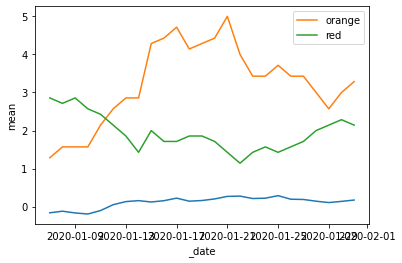

In [111]:
sns.lineplot(data=df_date, x=df_date.index, y=df_date["mean"].rolling(7).mean())
sns.lineplot(data=df_date, x=df_date.index, y=df_date["pos"].rolling(7).mean(),label="orange")
sns.lineplot(data=df_date, x=df_date.index, y=df_date["neg"].rolling(7).mean(),label="red")



# REDDIT AGGEGATED STATS

# Per Day Aggregation

In [ ]:
- Total Count + Aggregated Sentiment of Comments
- Total Count + Aggregated Sentiment of Submissions
- Topic Wise Counts + Aggregated Sentiment of Comments
- Topic Wise Counts + Aggregated Sentiment of Submissions
- Top 5 Active Subreddits
- Top 5 Most Shared URLs

In [267]:
import json
import pandas as pd
import requests

test_message = requests.get('https://data-management-ac8c8.firebaseio.com/aggregated.json')

test_dict = test_message.json()
topic = pd.DataFrame(json.loads(test_dict["topic"]))
    total = pd.DataFrame(json.loads(test_dict["total"]))
link = pd.DataFrame(json.loads(test_dict["link"]))
created = pd.DataFrame(json.loads(test_dict["created"]))
subreddit = pd.DataFrame(json.loads(test_dict["subreddit"]))

topic["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in topic["date"]]
total["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in total["date"]]
link["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in link["date"]]
created["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in created["date"]]
subreddit["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in subreddit["date"]]

In [319]:
with open("aggragated.json","w+") as f_wr:
    json.dump(test_message.json(),f_wr)

In [307]:
df = pd.read_pickle('one_df.pickle')
del df["moving_avg"]
temp_df=total.copy()
temp_df["user"]=["reddit_trump" if y == "trump" else "reddit_biden" for y in total["user"]]
temp_df = df.append(temp_df)
temp_df.sort_values(["user"],inplace=True)

temp_list = []
for u in temp_df["user"].unique():
    temp_list.extend(temp_df[temp_df["user"]==u]["mean"].rolling(7).mean())
temp_df["moving_avg"]=temp_list

In [312]:
temp_df.to_pickle('two_df.pickle')

In [315]:
temp_df[temp_df['user'].isin([])]

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,date,moving_avg


In [325]:
selected_value = ['trump','biden']

In [331]:
df = pd.read_pickle('one_df.pickle')
color_dict = {'trump':'red','biden':'blue'}

#del df["moving_avg"]
temp_df=total.copy()
temp_df["user"]=["reddit_trump" if y == "trump" else "reddit_biden" for y in total["user"]]
temp_df = df.append(temp_df)
temp_df.sort_values(["user"],inplace=True)

temp_list = []
for u in temp_df["user"].unique():
    temp_list.extend(temp_df[temp_df["user"]==u]["mean"].rolling(7).mean())
temp_df["moving_avg"]=temp_list

df = temp_df.copy()
#df["moving_avg"]=group_df[group_df["user"]=="biden"]["mean"].rolling(selected_slider).mean().append(group_df[group_df["user"]=="trump"]["mean"].rolling(selected_slider).mean())
#df.reset_index(inplace=True)
fig = ""


#df = df[df['user'].isin(selected_value)]

<AxesSubplot:xlabel='_date', ylabel='moving_avg'>

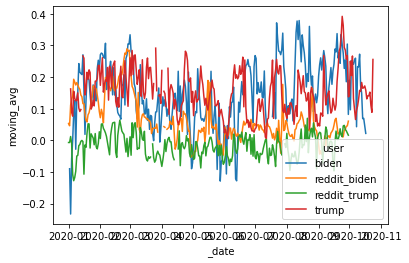

In [332]:
sns.lineplot(data=df, x="_date", y="moving_avg",hue=df["user"])
#sns.lineplot(data=df[df["user"]=="biden"], x="_date", y="moving_avg")

#sns.lineplot(data=df_date, x=df_date.index, y=df_date["pos"].rolling(7).mean(),label="orange")



In [313]:
test_list = ["trump","biden"]

In [316]:
temp_df

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,date,moving_avg
0,0.0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.18490,0.47830,0.7717,1.0,1.0,0.0,biden,1.0,NaN,NaN
198,198.0,2020-07-17,8.0,0.081088,0.522147,-0.5994,-0.312300,0.01280,0.38765,0.9211,2.0,2.0,4.0,biden,7.0,NaN,NaN
197,197.0,2020-07-16,5.0,-0.041500,0.784070,-0.8510,-0.848100,0.07720,0.61240,0.8020,2.0,2.0,1.0,biden,7.0,NaN,NaN
196,196.0,2020-07-15,6.0,0.045417,0.656432,-0.7964,-0.493775,0.16875,0.52940,0.7964,3.0,2.0,1.0,biden,7.0,NaN,NaN
195,195.0,2020-07-14,8.0,0.155600,0.626052,-0.6705,-0.400775,0.13660,0.78915,0.8750,3.0,3.0,2.0,biden,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,459.0,2020-06-17,20.0,0.243845,0.560576,-0.7678,0.000000,0.23765,0.77415,0.9683,10.0,4.0,6.0,trump,6.0,NaN,0.208888
460,460.0,2020-06-18,50.0,0.375398,0.666731,-0.9606,0.000000,0.73550,0.86715,0.9508,32.0,9.0,9.0,trump,6.0,NaN,0.220304
461,461.0,2020-06-19,23.0,0.263522,0.580156,-0.8746,0.000000,0.41990,0.82635,0.9689,13.0,4.0,6.0,trump,6.0,NaN,0.263233
463,463.0,2020-06-21,7.0,0.121271,0.546942,-0.8122,0.000000,0.00000,0.35605,0.9490,2.0,1.0,4.0,trump,6.0,NaN,0.254270


array(['biden', 'reddit_biden', 'reddit_trump', 'trump'], dtype=object)

In [268]:
group_df = df.groupby(['user','_date']).sum()
group_df.reset_index(inplace=True)
df["moving_avg"]=group_df[group_df["user"]=="biden"]["mean"].rolling(7).mean().append(group_df[group_df["user"]=="trump"]["mean"].rolling(7).mean())

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg,date
0,0.0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.18490,0.478300,0.7717,1.0,1.0,0.0,biden,1.0,NaN,NaN
1,1.0,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.72690,0.844000,0.9677,4.0,2.0,1.0,biden,1.0,NaN,NaN
2,2.0,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.58590,-0.265800,0.2263,0.0,5.0,2.0,biden,1.0,NaN,NaN
3,3.0,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.12800,0.585900,0.8126,2.0,1.0,2.0,biden,1.0,NaN,NaN
4,4.0,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.40050,-0.348250,-0.2960,0.0,2.0,1.0,biden,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,NaN,2020-09-28,100.0,0.068505,0.563675,-0.9934,-0.353925,0.00000,0.574225,0.9544,37.0,26.0,37.0,reddit_biden,NaN,NaN,1.601251e+12
544,NaN,2020-09-29,100.0,0.087448,0.632206,-0.9939,-0.463275,0.11255,0.687800,0.9657,44.0,29.0,27.0,reddit_trump,NaN,NaN,1.601338e+12
545,NaN,2020-09-29,100.0,0.038474,0.593260,-0.9593,-0.458475,0.02580,0.543825,0.9849,37.0,30.0,33.0,reddit_biden,NaN,NaN,1.601338e+12
546,NaN,2020-09-30,100.0,-0.006906,0.558176,-0.9632,-0.476700,0.00000,0.419925,0.9477,30.0,33.0,37.0,reddit_trump,NaN,NaN,1.601424e+12


In [278]:
group_df = temp_df.groupby(['user','_date']).sum()
group_df.reset_index(inplace=True)



In [279]:
group_df

,user,_date,25%,50%,75%,count,max,mean,min,neg,neu,pos,std,date
0,reddit_biden,2020-01-01,-0.246950,0.19535,0.710325,100.0,0.9940,0.177971,-0.9810,23.0,32.0,45.0,0.589034,1577836800000
1,reddit_biden,2020-01-02,-0.446800,0.00000,0.619475,100.0,0.9925,0.057303,-0.9501,29.0,34.0,37.0,0.596297,1577923200000
2,reddit_biden,2020-01-03,-0.327750,0.06145,0.587600,100.0,0.9957,0.083459,-0.9598,24.0,44.0,32.0,0.538834,1578009600000
3,reddit_biden,2020-01-04,-0.585950,0.11920,0.718550,100.0,0.9905,0.078127,-0.9982,29.0,32.0,39.0,0.655516,1578096000000
4,reddit_biden,2020-01-05,-0.750600,-0.49390,0.451650,100.0,0.9863,-0.187738,-0.9954,53.0,20.0,27.0,0.668443,1578182400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,reddit_trump,2020-09-26,-0.630800,0.11375,0.627525,100.0,0.9865,0.043627,-0.9956,32.0,25.0,43.0,0.662685,1601078400000
544,reddit_trump,2020-09-27,-0.757575,0.00000,0.541500,100.0,0.9848,-0.070402,-0.9781,42.0,26.0,32.0,0.671912,1601164800000
545,reddit_trump,2020-09-28,-0.630825,0.00000,0.586025,100.0,0.9898,-0.003538,-0.9934,35.0,32.0,33.0,0.632474,1601251200000
546,reddit_trump,2020-09-29,-0.463275,0.11255,0.687800,100.0,0.9657,0.087448,-0.9939,29.0,27.0,44.0,0.632206,1601337600000


In [335]:
one_df.to_csv("one_df.csv")

In [341]:
poll_data.keys()

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

In [455]:
poll_data = pd.read_csv('president_polls.csv')
poll_data["weighted_pct"]=poll_data["sample_size"]*poll_data["pct"]
poll_date = pd.DataFrame(poll_data.groupby(['answer','start_date'])["weighted_pct"].sum()/poll_data.groupby(['answer','start_date'])["sample_size"].sum())
poll_date.reset_index(inplace=True)
poll_date["_date"]=[datetime.strptime(x, '%m/%d/%y').date() for x in  poll_date["start_date"]]
poll_date.rename(columns={'answer': 'user',0:"pct"},inplace=True)
poll_date = poll_date[(poll_date["user"].isin(["Trump","Biden"])) & (poll_date["_date"]>=datetime.strptime("01/01/20", '%m/%d/%y').date())]
poll_date["user"]=["poll_trump" if y == "Trump" else "poll_biden" for y in poll_date["user"]]
poll_date["mean"]=[calNormalize(m) for m in poll_date["pct"]]

In [456]:
poll_date

,user,start_date,pct,_date,mean
10,poll_biden,1/10/20,46.000000,2020-01-10,0.920000
11,poll_biden,1/11/20,45.000000,2020-01-11,0.900000
12,poll_biden,1/14/20,52.479039,2020-01-14,1.049581
13,poll_biden,1/15/20,45.949025,2020-01-15,0.918980
14,poll_biden,1/16/20,46.848320,2020-01-16,0.936966
...,...,...,...,...,...
1863,poll_trump,9/5/20,43.003529,2020-09-05,0.860071
1865,poll_trump,9/6/20,43.482948,2020-09-06,0.869659
1867,poll_trump,9/7/20,44.202795,2020-09-07,0.884056
1868,poll_trump,9/8/20,43.661142,2020-09-08,0.873223


In [457]:
one_df

,level_0,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


In [453]:
def calNormalize(t_val):
    return 1-((50-t_val)*2)/100

[0.92,
 0.9,
 1.0495807833537332,
 0.918980490874764,
 0.9369664065151001,
 1.0,
 0.92,
 0.9511307847082494,
 0.9225006530256857,
 0.9,
 0.98,
 1.0,
 0.92,
 0.7380457637600495,
 0.9965978152929494,
 0.9007272727272728,
 0.846832298136646,
 0.9300033233632437,
 0.92,
 0.69,
 0.9706595602931379,
 1.019223872679045,
 1.0473792367723123,
 1.027952010912743,
 1.0179874084233769,
 1.0434654387675995,
 1.0366464810126583,
 1.0516249739734898,
 1.0222006347234227,
 1.0531159697803698,
 1.0462744586330601,
 1.057660575148296,
 1.0372321267750417,
 1.0204522239733012,
 1.0495658358008635,
 1.0302032845095428,
 1.0175172407020026,
 1.0287933818539234,
 0.9953383430241138,
 1.0236277657505597,
 1.0239901072904969,
 1.0238143641029014,
 1.031640719797879,
 1.0286906158017939,
 1.037701662279275,
 1.0262031158921097,
 1.0216200624949925,
 1.044517777125526,
 1.0593106509862389,
 1.0543202201891766,
 1.0448458944887569,
 1.036627041811042,
 1.0253241429493816,
 1.0035907630522087,
 1.198,
 0.85157534

In [429]:
len(poll_date[)

1071

In [421]:
len(poll_date)

2111

In [415]:
poll_date.rename(columns={'answer': ''},inplace=True)

In [416]:
poll_date

,user,start_date,0,_date
0,Amash,4/14/20,1.00,2020-04-14
1,Amash,4/30/20,5.00,2020-04-30
2,Amash,5/11/20,4.49,2020-05-11
3,Amash,5/14/20,3.00,2020-05-14
4,Amash,5/28/19,9.70,2019-05-28
...,...,...,...,...
2106,de Blasio,5/26/19,38.00,2019-05-26
2107,de Blasio,6/2/19,48.00,2019-06-02
2108,de Blasio,6/23/19,25.00,2019-06-23
2109,de Blasio,7/26/19,26.00,2019-07-26


In [351]:
poll_data['answer']

0            Biden
1            Trump
2            Biden
3            Trump
4        Jorgensen
           ...    
16433        Trump
16434       Warren
16435        Trump
16436        Obama
16437        Trump
Name: answer, Length: 16438, dtype: object

,answer,start_date,0
1415,Trump,1/10/19,43.000000
1416,Trump,1/10/20,50.500000
1417,Trump,1/11/20,44.000000
1418,Trump,1/14/20,41.658177
1419,Trump,1/15/20,42.169052
...,...,...,...
1866,Trump,9/7/19,41.779358
1867,Trump,9/7/20,44.202795
1868,Trump,9/8/20,43.661142
1869,Trump,9/9/19,43.000000


KeyError: 'answer'

In [382]:
temp = poll_data[(poll_data["start_date"]=="1/11/20") & (poll_data["answer"]=="Biden")][["start_date","answer","sample_size","pct","weighted_pct"]]
temp

,start_date,answer,sample_size,pct,weighted_pct
13613,1/11/20,Biden,1108.0,45.0,49860.0


In [383]:
temp["weighted_pct"].sum()

49860.0

In [384]:
sum(temp["sample_size"])

1108.0

In [385]:
temp["weighted_pct"].sum()/sum(temp["sample_size"])

45.0

In [374]:
test.groupby(['answer','start_date'])["weighted_pct"].sum()/test.groupby(['answer','start_date'])["sample_size"].sum()

answer  start_date
Biden   1/10/20       46.000000
        1/11/20       45.000000
        1/14/20       52.479039
        1/15/20       45.949025
        1/16/20       46.848320
                        ...    
        9/7/19        46.818009
        9/7/20        51.343556
        9/8/20        51.693435
        9/9/19        42.000000
        9/9/20        53.419797
Length: 443, dtype: float64

In [375]:
test.groupby(['answer','start_date'])["weighted_pct"].sum()

answer  start_date
Biden   1/10/20         23920.00
        1/11/20         49860.00
        1/14/20        343003.00
        1/15/20        584104.00
        1/16/20        138062.00
                         ...    
        9/7/19         148179.00
        9/7/20        3324906.00
        9/8/20        4377555.16
        9/9/19          21840.00
        9/9/20        5002817.45
Name: weighted_pct, Length: 443, dtype: float64

In [376]:
test.groupby(['answer','start_date'])["sample_size"].sum()

answer  start_date
Biden   1/10/20         520.0
        1/11/20        1108.0
        1/14/20        6536.0
        1/15/20       12712.0
        1/16/20        2947.0
                       ...   
        9/7/19         3165.0
        9/7/20        64758.0
        9/8/20        84683.0
        9/9/19          520.0
        9/9/20        93651.0
Name: sample_size, Length: 443, dtype: float64

In [473]:
trump_df

,date,device,favorites,id,isdeleted,isretweet,retweets,text,_date,month,hashtags,users,vader_dict,textblob_compound,vader_compound
0,2020-03-03 01:34:50,Twitter for iPhone,73748,1234653427789070300,f,f,17404,I was thrilled to be back in the Great city of...,2020-03-03,3,[KAG2020],[],"{'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'comp...",0.458929,0.9792
1,2020-01-17 03:22:47,Twitter for iPhone,0,1218010753434820600,f,t,7396,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17,1,[],[CBS_Herridge],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.050000,0.0000
2,2020-09-12 20:10:58,Twitter for iPhone,80527,1304875170860015600,f,f,23502,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12,9,[],[],"{'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'comp...",0.021131,-0.9571
3,2020-01-17 13:13:59,Twitter for iPhone,0,1218159531554898000,f,t,9081,RT @MZHemingway: Very friendly telling of even...,2020-01-17,1,[],[MZHemingway],"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.268750,0.5413
4,2020-10-23 22:04:14,Twitter for iPhone,100564,1319761576996573200,f,f,18992,THANK YOU to all of the Great American Patriot...,2020-10-23,10,[MAGA],[],"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.400000,0.8236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10258,2020-10-23 03:42:05,Twitter for iPhone,0,1319484210101379000,f,t,9912,RT @EliseStefanik: President @realDonaldTrump ...,2020-10-23,10,[],"[EliseStefanik, realDonaldTrump]","{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.050000,0.5423
10259,2020-10-23 01:03:58,Twitter for iPhone,0,1319444420861829000,f,t,8249,RT @TeamTrump: LIVE: Presidential Debate #Deba...,2020-10-23,10,[Debates2020],[TeamTrump],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.136364,0.0000
10260,2020-10-22 21:04:21,Twitter for iPhone,175950,1319384118849949700,f,f,36098,Just signed an order to support the workers of...,2020-10-22,10,[],[],"{'neg': 0.172, 'neu': 0.677, 'pos': 0.151, 'co...",-0.026786,-0.4678
10261,2020-10-22 18:31:46,Twitter for iPhone,95325,1319345719829008400,f,f,19639,Suburban women want Safety &amp; Security. Joe...,2020-10-22,10,[],[],"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.000000,0.6996


In [471]:
biden_df['tweet id'][0]

1317262047420190720

In [ ]:
url_txt = "https://twitter.com/realDonaldTrump/status/"+1330319748660416513

In [475]:
total

,25%,50%,75%,count,max,mean,min,neg,neu,pos,std,user,date,_date
0,-0.690175,0.00000,0.320300,100.0,0.9931,-0.112675,-0.9976,40.0,35.0,25.0,0.589441,trump,1577836800000,2020-01-01
1,-0.246950,0.19535,0.710325,100.0,0.9940,0.177971,-0.9810,23.0,32.0,45.0,0.589034,biden,1577836800000,2020-01-01
2,-0.263325,0.03960,0.638175,100.0,0.9925,0.114558,-0.9911,22.0,35.0,43.0,0.572427,trump,1577923200000,2020-01-02
3,-0.446800,0.00000,0.619475,100.0,0.9925,0.057303,-0.9501,29.0,34.0,37.0,0.596297,biden,1577923200000,2020-01-02
4,-0.537725,0.10300,0.673075,100.0,0.9941,0.087543,-0.9939,31.0,24.0,45.0,0.633012,trump,1578009600000,2020-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,-0.353925,0.00000,0.574225,100.0,0.9544,0.068505,-0.9934,26.0,37.0,37.0,0.563675,biden,1601251200000,2020-09-28
544,-0.463275,0.11255,0.687800,100.0,0.9657,0.087448,-0.9939,29.0,27.0,44.0,0.632206,trump,1601337600000,2020-09-29
545,-0.458475,0.02580,0.543825,100.0,0.9849,0.038474,-0.9593,30.0,33.0,37.0,0.593260,biden,1601337600000,2020-09-29
546,-0.476700,0.00000,0.419925,100.0,0.9477,-0.006906,-0.9632,33.0,37.0,30.0,0.558176,trump,1601424000000,2020-09-30


,level_0,index,_date,count,mean_x,std,min,25%,50%,75%,...,pos,neg,neu,user_x,month,moving_avg,user_y,start_date,pct,mean_y
0,292,292,2020-01-02,17.0,0.027641,0.592655,-0.9121,-0.498100,0.00000,0.636000,...,6,5,6.0,trump,1,NaN,poll_trump,1/2/20,46.750000,0.935000
1,293,293,2020-01-03,32.0,-0.118222,0.522402,-0.9422,-0.569600,-0.14130,0.327800,...,8,12,12.0,trump,1,NaN,poll_trump,1/3/20,45.616837,0.912337
2,295,295,2020-01-05,3.0,0.218733,0.791107,-0.6476,-0.123300,0.40100,0.651900,...,2,1,0.0,trump,1,NaN,poll_trump,1/5/20,40.999834,0.819997
3,296,296,2020-01-06,8.0,0.151800,0.568580,-0.8441,-0.089875,0.15445,0.613650,...,3,2,3.0,trump,1,NaN,poll_trump,1/6/20,41.600000,0.832000
4,297,297,2020-01-07,33.0,0.068976,0.412862,-0.8689,-0.202300,0.00000,0.421500,...,10,4,19.0,trump,1,0.069254,poll_trump,1/7/20,62.500000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.00000,0.135275,...,2,3,3.0,trump,10,0.164793,poll_trump,10/20/20,44.778417,0.895568
276,585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.20030,0.756300,...,17,6,14.0,trump,10,0.166637,poll_trump,10/21/20,45.079677,0.901594
277,586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.15110,0.689400,...,12,7,7.0,trump,10,0.172223,poll_trump,10/22/20,45.515516,0.910310
278,587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.00000,0.549700,...,18,7,23.0,trump,10,0.158910,poll_trump,10/23/20,44.283058,0.885661


In [485]:
from scipy.stats import pearsonr


In [520]:
for a in range(1,200):
    xt= pd.merge(one_df[one_df["user"]=="biden"],poll_date[poll_date["user"]=="poll_biden"],left_on="_date",right_on="_date")
    xt
    xt1=xt["mean_x"].rolling(a).mean()[a-1:]
    xt2=xt["pct"].rolling(a).mean()[a-1:]
    corr, _ = pearsonr(xt1,xt2)
    print(a)
    print('Pearsons correlation: %.3f' % corr)

1
Pearsons correlation: 0.146
2
Pearsons correlation: 0.249
3
Pearsons correlation: 0.277
4
Pearsons correlation: 0.321
5
Pearsons correlation: 0.336
6
Pearsons correlation: 0.343
7
Pearsons correlation: 0.353
8
Pearsons correlation: 0.365
9
Pearsons correlation: 0.371
10
Pearsons correlation: 0.381
11
Pearsons correlation: 0.394
12
Pearsons correlation: 0.405
13
Pearsons correlation: 0.414
14
Pearsons correlation: 0.424
15
Pearsons correlation: 0.433
16
Pearsons correlation: 0.439
17
Pearsons correlation: 0.445
18
Pearsons correlation: 0.449
19
Pearsons correlation: 0.455
20
Pearsons correlation: 0.459
21
Pearsons correlation: 0.462
22
Pearsons correlation: 0.463
23
Pearsons correlation: 0.465
24
Pearsons correlation: 0.467
25
Pearsons correlation: 0.471
26
Pearsons correlation: 0.474
27
Pearsons correlation: 0.478
28
Pearsons correlation: 0.481
29
Pearsons correlation: 0.483
30
Pearsons correlation: 0.484
31
Pearsons correlation: 0.485
32
Pearsons correlation: 0.486
33
Pearsons corre

In [521]:
len(xt)

273

In [515]:
xt2

119    47.162362
120    47.170084
121    47.172862
122    47.173696
123    47.168745
         ...    
268    51.577493
269    51.592880
270    51.594485
271    51.610723
272    51.613606
Name: pct, Length: 154, dtype: float64

In [552]:
topic["month"]=pd.DatetimeIndex(topic['_date']).month

In [553]:
topic["week"]=pd.DatetimeIndex(topic['_date']).week
topic.groupby(["graph_topic","week"])["count","mean","pos","neu","neg"].sum()
temp_df.reset_index(inplace=True)

In [563]:
temp_df=topic.groupby(["graph_topic","week"])["count","count"].sum()

In [566]:

temp_df["count"][0]

KeyError: 0

In [562]:
temp_df

,graph_topic,week,count,mean,pos,neu,neg
0,1,1,219.0,-0.166318,75,57.0,87
1,1,2,234.0,0.158356,89,49.0,96
2,1,3,200.0,0.729411,76,60.0,64
3,1,4,267.0,1.095204,111,71.0,85
4,1,5,294.0,0.400963,113,82.0,99
...,...,...,...,...,...,...,...
195,5,36,75.0,-1.292843,22,22.0,31
196,5,37,102.0,-1.049982,38,24.0,40
197,5,38,96.0,0.350881,38,38.0,20
198,5,39,113.0,1.948244,50,24.0,39


In [568]:
link["month"]=pd.DatetimeIndex(link['_date']).month
link["week"]=pd.DatetimeIndex(link['_date']).week

In [572]:
df = link[link["month"]==1]

In [586]:
temp_df=pd.DataFrame(df.groupby(["title","url"])["doc_count"].sum())

In [587]:
temp_df = temp_df.sort_values(["doc_count"],ascending=False).head(5)
temp_df.reset_index(inplace=True)

In [592]:
temp_df.iloc[0]

title        Megathread: Iran launches missiles at US airba...
url          https://www.reddit.com/r/politics/comments/elk...
doc_count                                                 4532
Name: 0, dtype: object

In [597]:
subreddit["month"]=pd.DatetimeIndex(subreddit['_date']).month

df = subreddit[(subreddit["month"]==1) & (subreddit["user"]=="trump")]
temp_df=pd.DataFrame(df.groupby(["key"])["doc_count"].sum())
temp_df = temp_df.sort_values(["doc_count"],ascending=False).head(4)
temp_df.reset_index(inplace=True)

In [600]:
temp_df.iloc[0]

'politics'

In [603]:
import plotly.express as px


In [623]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Pie(labels=['Biden','Trump'],
#                              values=[2799,10263])])

In [643]:
tdf= pd.DataFrame({'user':['biden','trump'],'count':[2799,10263]})
fig2 = px.pie(tdf, values='count',color_discrete_map={'trump':'red','biden':'blue'}, names='user',title="Total Tweets")

In [648]:
import pandas as pd

In [650]:
pdf = pd.read_pickle('one_df.pickle')

In [653]:
post_message = pdf.to_json(orient='records')

In [654]:
import requests

In [655]:
# result = requests.put('https://data-management-ac8c8.firebaseio.com/one_aggregated.json',json.dumps(post_message))

<Response [200]>

In [663]:
test_message = requests.get('https://data-management-ac8c8.firebaseio.com/one_aggregated.json')
df_global = pd.DataFrame(json.loads(test_message.json()))
df_global["_date"] = [datetime.utcfromtimestamp(u/1000).date() for u in df_global["_date"]]


In [664]:
df_global

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


In [665]:
pdf

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


In [661]:
one_df

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,1577836800000,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,1577923200000,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,1578009600000,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,1578096000000,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,1578182400000,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,1603152000000,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,1603238400000,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,1603324800000,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,1603411200000,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


In [662]:
pdf

,index,_date,count,mean,std,min,25%,50%,75%,max,pos,neg,neu,user,month,moving_avg
0,0,2020-01-01,2.0,0.184900,0.829861,-0.4019,-0.108500,0.1849,0.478300,0.7717,1,1,0.0,biden,1,NaN
1,1,2020-01-02,7.0,0.366343,0.668235,-0.5719,-0.123150,0.7269,0.844000,0.9677,4,2,1.0,biden,1,NaN
2,2,2020-01-03,7.0,-0.441457,0.400388,-0.7814,-0.708800,-0.5859,-0.265800,0.2263,0,5,2.0,biden,1,NaN
3,3,2020-01-04,5.0,0.146020,0.622018,-0.7964,0.000000,0.1280,0.585900,0.8126,2,1,2.0,biden,1,NaN
4,4,2020-01-05,3.0,-0.524433,0.309599,-0.8768,-0.638650,-0.4005,-0.348250,-0.2960,0,2,1.0,biden,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,2020-10-20,8.0,-0.019200,0.539334,-0.6197,-0.445225,0.0000,0.135275,0.9197,2,3,3.0,trump,10,0.164793
585,585,2020-10-21,37.0,0.232635,0.529561,-0.8883,0.000000,0.2003,0.756300,0.9114,17,6,14.0,trump,10,0.166637
586,586,2020-10-22,26.0,0.133269,0.621152,-0.8883,-0.419150,0.1511,0.689400,0.9566,12,7,7.0,trump,10,0.172223
587,587,2020-10-23,48.0,0.172200,0.457340,-0.9476,0.000000,0.0000,0.549700,0.9762,18,7,23.0,trump,10,0.158910


In [666]:
len(pdf)

589

In [669]:
(589)/2

294.5